In [90]:
from zipfile import error

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [91]:
df = pd.read_csv('regular.csv')
df

,Unnamed: 0,run_id,final_state,target_character,pe,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,15,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,2,def,hr,6,0,...,0.011111,0.533333,0.533333,26.000002,2.566667,0.400000,0.0,0.033333,0.200000,1.000000
1,16,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,2,def,hr,6,0,...,0.000000,0.000000,0.000000,26.000000,2.666667,0.333333,0.0,0.000000,0.166667,0.966667
2,17,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,2,def,hr,6,0,...,0.033333,0.633333,0.600000,26.214287,2.566667,0.333333,0.0,0.100000,0.166667,0.933333
3,18,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,2,def,hr,6,0,...,0.000000,0.600000,0.133333,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,19,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,2,def,hr,6,0,...,0.000000,0.166667,0.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,1759,xvccdq3u,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-3_1_s-8,3,got,2,sa,hr,9,5,...,0.300000,1.000000,0.877778,28.444445,2.100000,0.000000,0.0,0.900000,0.233333,0.300000
1730,1760,xvccdq3u,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-3_1_s-8,3,got,2,sa,hr,9,5,...,1.000000,1.000000,1.000000,26.133335,0.000000,0.000000,0.0,3.000000,1.000000,1.000000
1731,1761,xvccdq3u,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-3_1_s-8,3,got,2,sa,hr,9,5,...,0.900000,1.000000,0.988889,26.444445,0.300000,0.000000,0.0,2.700000,0.900000,0.900000
1732,1762,xvccdq3u,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-3_1_s-8,3,got,2,sa,hr,9,5,...,1.000000,1.000000,1.000000,26.066668,0.000000,0.000000,0.0,3.000000,0.966667,1.000000


In [92]:
df.columns

Index(['Unnamed: 0', 'run_id', 'final_state', 'target_character', 'pe',
       'branch_factor', 'exp_name', 'evaluator', 'total_iterations',
       'n_self_alignment', 'feedback_type', 'total_timesteps',
       'reward_feature', 'fewshot', 'problem', 'seed',
       'Evaluation/llm_iteration', 'Evaluation/acc_imp_perc',
       'Evaluation/exist_imp_perc', 'Evaluation/reach_imp_perc',
       'Evaluation/path_length', 'Evaluation/fn_imp_perc',
       'Evaluation/fp_imp_perc', 'Evaluation/tn_imp_perc',
       'Evaluation/tp_imp_perc', 'Evaluation/solvability',
       'Evaluation/playability'],
      dtype='object')

In [93]:
df.groupby(['pe', 'n_self_alignment', 'target_character', 'seed'])['run_id'].count()

pe   n_self_alignment  target_character  seed
cot  0                 1                 1       12
                                         2       12
                                         3       12
                                         4        4
                                         5       12
                                                 ..
tot  5                 3                 4       14
                                         5       12
                                         6       12
                                         7       14
                                         8       14
Name: run_id, Length: 108, dtype: int64

In [94]:
sixiter_df = df[df['Evaluation/llm_iteration'] == 6]
sixiter_df

,Unnamed: 0,run_id,final_state,target_character,pe,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
5,20,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,2,def,hr,6,0,...,0.000000,0.200000,0.000000,0.000000,3.000000,0.0,0.000000,0.0,0.000000,0.000000
11,26,h5m442q9,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-2_1_s-1,2,cot,2,def,hr,6,0,...,0.000000,0.950000,0.333333,0.000000,3.000000,0.0,0.000000,0.0,0.000000,0.000000
17,32,ak7yr998,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-2,1,cot,2,def,hr,6,0,...,0.000000,0.600000,0.066667,28.000000,3.000000,0.0,0.000000,0.0,0.000000,0.066667
23,38,64by6nfj,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-3_1_s-1,3,cot,2,def,hr,6,0,...,0.000000,0.366667,0.055556,0.000000,3.000000,0.0,0.000000,0.0,0.000000,0.000000
31,46,5pes8uti,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-3_1_s-2,3,cot,2,def,hr,6,0,...,0.300000,0.966667,0.666667,28.200001,2.100000,0.0,0.000000,0.9,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,1732,hizbd90c,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-3_1_s-7,3,got,2,sa,hr,9,5,...,0.000000,0.011111,0.011111,27.000000,3.000000,0.0,0.000000,0.0,0.000000,0.200000
1708,1738,hk57h4jn,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,got,2,sa,hr,9,5,...,0.055556,0.750000,0.333333,28.000000,2.833333,0.0,0.066667,0.1,0.066667,0.166667
1715,1745,a2b89urb,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-1_1_s-8,1,got,2,sa,hr,9,5,...,0.000000,0.133333,0.133333,26.066668,2.800000,0.2,0.000000,0.0,0.100000,1.000000
1721,1751,412z0saz,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-1_1_s-7,1,got,2,sa,hr,9,5,...,0.000000,0.533333,0.266667,28.500000,3.000000,0.0,0.000000,0.0,0.000000,0.400000


In [95]:
original_cols = sixiter_df.columns
evaluation_cols = [col for col in original_cols if 'Evaluation' in col]
evaluation_cols.remove('Evaluation/llm_iteration')
evaluation_cols.remove('Evaluation/path_length')
evaluation_cols

['Evaluation/acc_imp_perc',
 'Evaluation/exist_imp_perc',
 'Evaluation/reach_imp_perc',
 'Evaluation/fn_imp_perc',
 'Evaluation/fp_imp_perc',
 'Evaluation/tn_imp_perc',
 'Evaluation/tp_imp_perc',
 'Evaluation/solvability',
 'Evaluation/playability']

In [100]:
melted_df = sixiter_df.melt(id_vars=['pe', 'n_self_alignment', 'target_character', 'seed'], value_vars=evaluation_cols)
melted_df

,pe,n_self_alignment,target_character,seed,variable,value
0,cot,0,1,1,Evaluation/acc_imp_perc,0.000000
1,cot,0,2,1,Evaluation/acc_imp_perc,0.000000
2,cot,0,1,2,Evaluation/acc_imp_perc,0.000000
3,cot,0,3,1,Evaluation/acc_imp_perc,0.000000
4,cot,0,3,2,Evaluation/acc_imp_perc,0.300000
...,...,...,...,...,...,...
1957,got,5,3,7,Evaluation/playability,0.200000
1958,got,5,2,7,Evaluation/playability,0.166667
1959,got,5,1,8,Evaluation/playability,1.000000
1960,got,5,1,7,Evaluation/playability,0.400000


In [139]:


# Map n_self_alignment values to names
alignment_mapping = {0: 'w/o Self-alignment', 5: 'w/ Self-alignment'}
pe_mapping = {'cot': 'CoT', 'tot': 'ToT', 'got': 'GoT'}
character_mapping = {1: '1/3 Enemy', 2: '2/3 Enemies', 3: '3/3 Enemies'}

# Filter data where llm_iteration == 6
filtered_df = df[df['Evaluation/llm_iteration'] == 6]

# Replace n_self_alignment and pe with meaningful names
filtered_df['n_self_alignment'] = filtered_df['n_self_alignment'].map(alignment_mapping)
filtered_df['pe'] = filtered_df['pe'].map(pe_mapping)
filtered_df['target_character'] = filtered_df['target_character'].map(character_mapping)

# Group by 'Alignment', 'Prompt Engineering', and 'Scenario', and calculate mean
grouped_df = filtered_df.groupby(['n_self_alignment', 'pe', 'target_character']).agg({
    'Evaluation/acc_imp_perc': 'mean'
}).reset_index()

# Pivot table with Alignment and sorted Prompt Engineering
pivot_df = grouped_df.pivot(index='target_character', 
                            columns=['n_self_alignment', 'pe'], 
                            values='Evaluation/acc_imp_perc')

# Rename the index and column labels
pivot_df.index.name = 'Scenario'
pivot_df.columns.names = ['Alignment', 'Prompt Engineering']

# Reorder Prompt Engineering within each Alignment group
pivot_df = pivot_df.sort_index(axis=1, level=[0, 1], sort_remaining=False)
pivot_df = pivot_df.reindex(columns=['CoT', 'ToT', 'GoT'], level=1)

# Round values to 3 decimal places
pivot_df = pivot_df.round(3)

# Add a Mean row at the bottom
pivot_df.loc['Mean'] = pivot_df.mean()

# Style the table
def highlight_mean(s):
    return ['background-color: ' if s.name == 'Mean' else '' for _ in s]


styled_df = pivot_df.style.set_table_styles([
    # Header (Top) Styling
    {'selector': 'th',
     'props': [('font-size', '10pt'), 
               ('text-align', 'center'), 
               ('background-color', '#f4f4f4'), 
               ('color', '#000000'),
               ('padding', '8px'), 
               ('border', '1px solid black')]},  # Header border
    
    # Table Caption (Title) Styling
    {'selector': 'caption',
     'props': [('caption-side', 'top'), 
               ('font-size', '12pt'), 
               ('font-weight', 'bold'), 
               ('background-color', '#ededed'),  # Light green background
               ('color', '#000000'),
               ('padding', '8px'),
               ('border', '1px solid black')]},  # Title border
    
    # Table Cell Styling
    {'selector': 'td',
     'props': [('background-color', '#ffffff'), 
               ('color', '#000000'),
               ('padding', '6px'),
               ('border', '1px solid black')]},  # Cell borders
    
    # Table Styling
    {'selector': 'table',
     'props': [('border-collapse', 'collapse'), 
               ('border', '2px solid black'), ('padding', '6px'),]}  # Overall table border
], overwrite=True).set_caption("Reasoning-based Prompt Engineering") \
  .format("{:.3f}") \
  .apply(lambda s: ['background-color: #e8f4e8' if s.name == 'Mean' else '' for _ in s], axis=1)

# Display the styled table
display(styled_df)


/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_17792/3490773416.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['n_self_alignment'] = filtered_df['n_self_alignment'].map(alignment_mapping)
/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_17792/3490773416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pe'] = filtered_df['pe'].map(pe_mapping)
/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_17792/3490773416.py:12: SettingWithCopyWarning: 
A v

In [97]:
# replace the 'Evaluation/' prefix with an empty string
melted_df['variable'] = melted_df['variable'].str.replace('Evaluation/', '')
melted_df

,pe,n_self_alignment,target_character,seed,variable,value
0,cot,0,1,1,acc_imp_perc,0.000000
1,cot,0,2,1,acc_imp_perc,0.000000
2,cot,0,1,2,acc_imp_perc,0.000000
3,cot,0,3,1,acc_imp_perc,0.000000
4,cot,0,3,2,acc_imp_perc,0.300000
...,...,...,...,...,...,...
1957,got,5,3,7,playability,0.200000
1958,got,5,2,7,playability,0.166667
1959,got,5,1,8,playability,1.000000
1960,got,5,1,7,playability,0.400000


In [98]:
melted_df['alignment_group'] = melted_df['n_self_alignment'].apply(lambda x: 'self-aligned' if x > 0 else 'non-aligned')

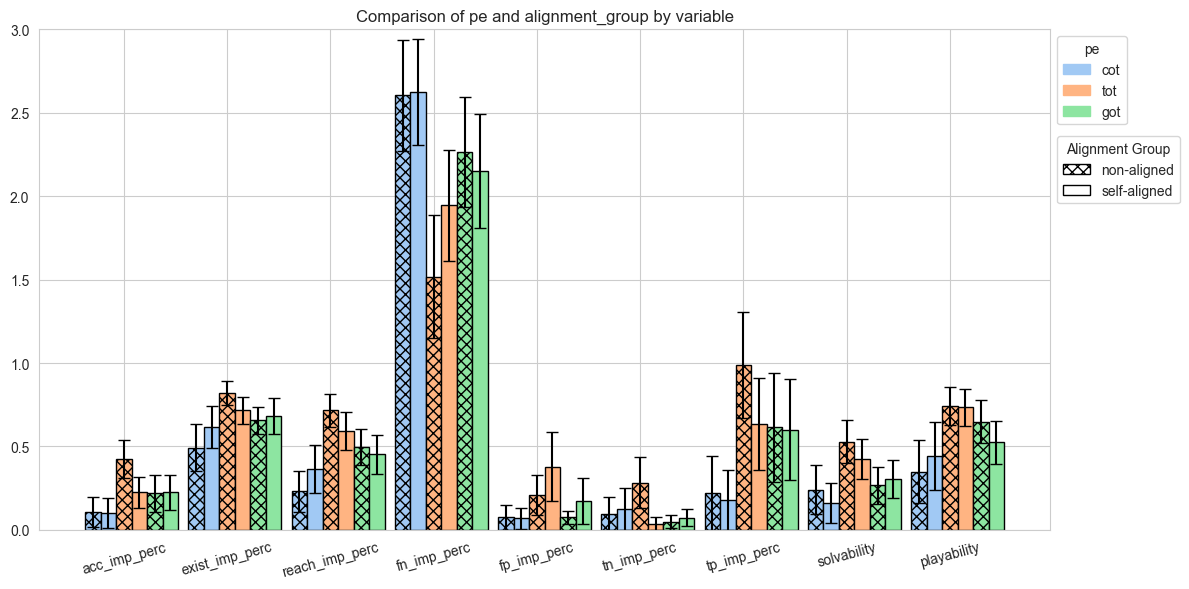

In [99]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sns

# 데이터 준비
plt.figure(figsize=(12, 6))

# 패턴과 색상 설정
hatches = {'non-aligned': 'xxx', 'self-aligned': ''}
palette = sns.color_palette("pastel", len(melted_df['pe'].unique()))

# 막대 너비 설정
bar_width = 0.3

# x축의 변수별로 막대 그리기
x_labels = melted_df['variable'].unique()
x_pos = range(len(x_labels))  # x축의 위치

def compute_ci(data, confidence=0.95):
    if len(data) > 1:  # 데이터 길이가 1보다 클 때만 CI 계산
        ci_low, ci_high = sms.DescrStatsW(data).tconfint_mean(alpha=1-confidence)
        return (ci_high - ci_low) / 2  # CI 반절 길이 반환
    else:
        return 0  # 데이터가 하나일 경우 CI는 0
    
for i, var in enumerate(x_labels):  # 각 variable 그룹
    sub_df = melted_df[melted_df['variable'] == var]
    for j, pe in enumerate(sub_df['pe'].unique()):  # pe 그룹
        pe_df = sub_df[sub_df['pe'] == pe]
        for k, align_group in enumerate(pe_df['alignment_group'].unique()):  # alignment 그룹
            align_df = pe_df[pe_df['alignment_group'] == align_group]
            
            # 평균과 표준편차 계산
            mean_value = align_df['value'].mean()
            ci = compute_ci(align_df['value'])  # 신뢰구간 계산
            
            # 막대 그리기 (오차 범위 yerr 추가)
            plt.bar(
                x=i + (j * bar_width) + (k * (bar_width / 2)) - bar_width,  # x축 위치 조정
                height=mean_value,
                width=bar_width / 2,  # 막대 너비
                color=palette[j],
                edgecolor='black',
                hatch=hatches[align_group],
                yerr=ci,  # 표준편차를 오차 범위로 표시
                capsize=4,       # 오차 막대 끝에 캡 추가
                label=f"{pe} - {align_group}" if i == 0 else ""
            )

# 커스텀 범례 만들기
handles_color = [mpatches.Patch(color=palette[i], label=pe) for i, pe in enumerate(melted_df['pe'].unique())]
handles_hatch = [mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatches[grp], label=grp)
                 for grp in hatches.keys()]

# 범례 추가
legend1 = plt.legend(handles=handles_color, title="pe", loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().add_artist(legend1)
plt.legend(handles=handles_hatch, title="Alignment Group", loc="upper left", bbox_to_anchor=(1, 0.8))

# 그래프 설정
plt.xticks(range(len(x_labels)), x_labels, rotation=15)
plt.ylim(0, 3)
plt.title("Comparison of pe and alignment_group by variable")
plt.tight_layout()
plt.show()
